In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
#Upload insurance dataset
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (3).csv


In [77]:
#Import data and data understanding
raw_data = pd.read_csv('insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
#Convert categorical data to number
raw_data['smoker'] = raw_data['smoker'].map({'no': 0, 'yes': 1})
raw_data['sex'] = raw_data['sex'].map({'female': 0, 'male': 1})
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [79]:
#Summary of data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


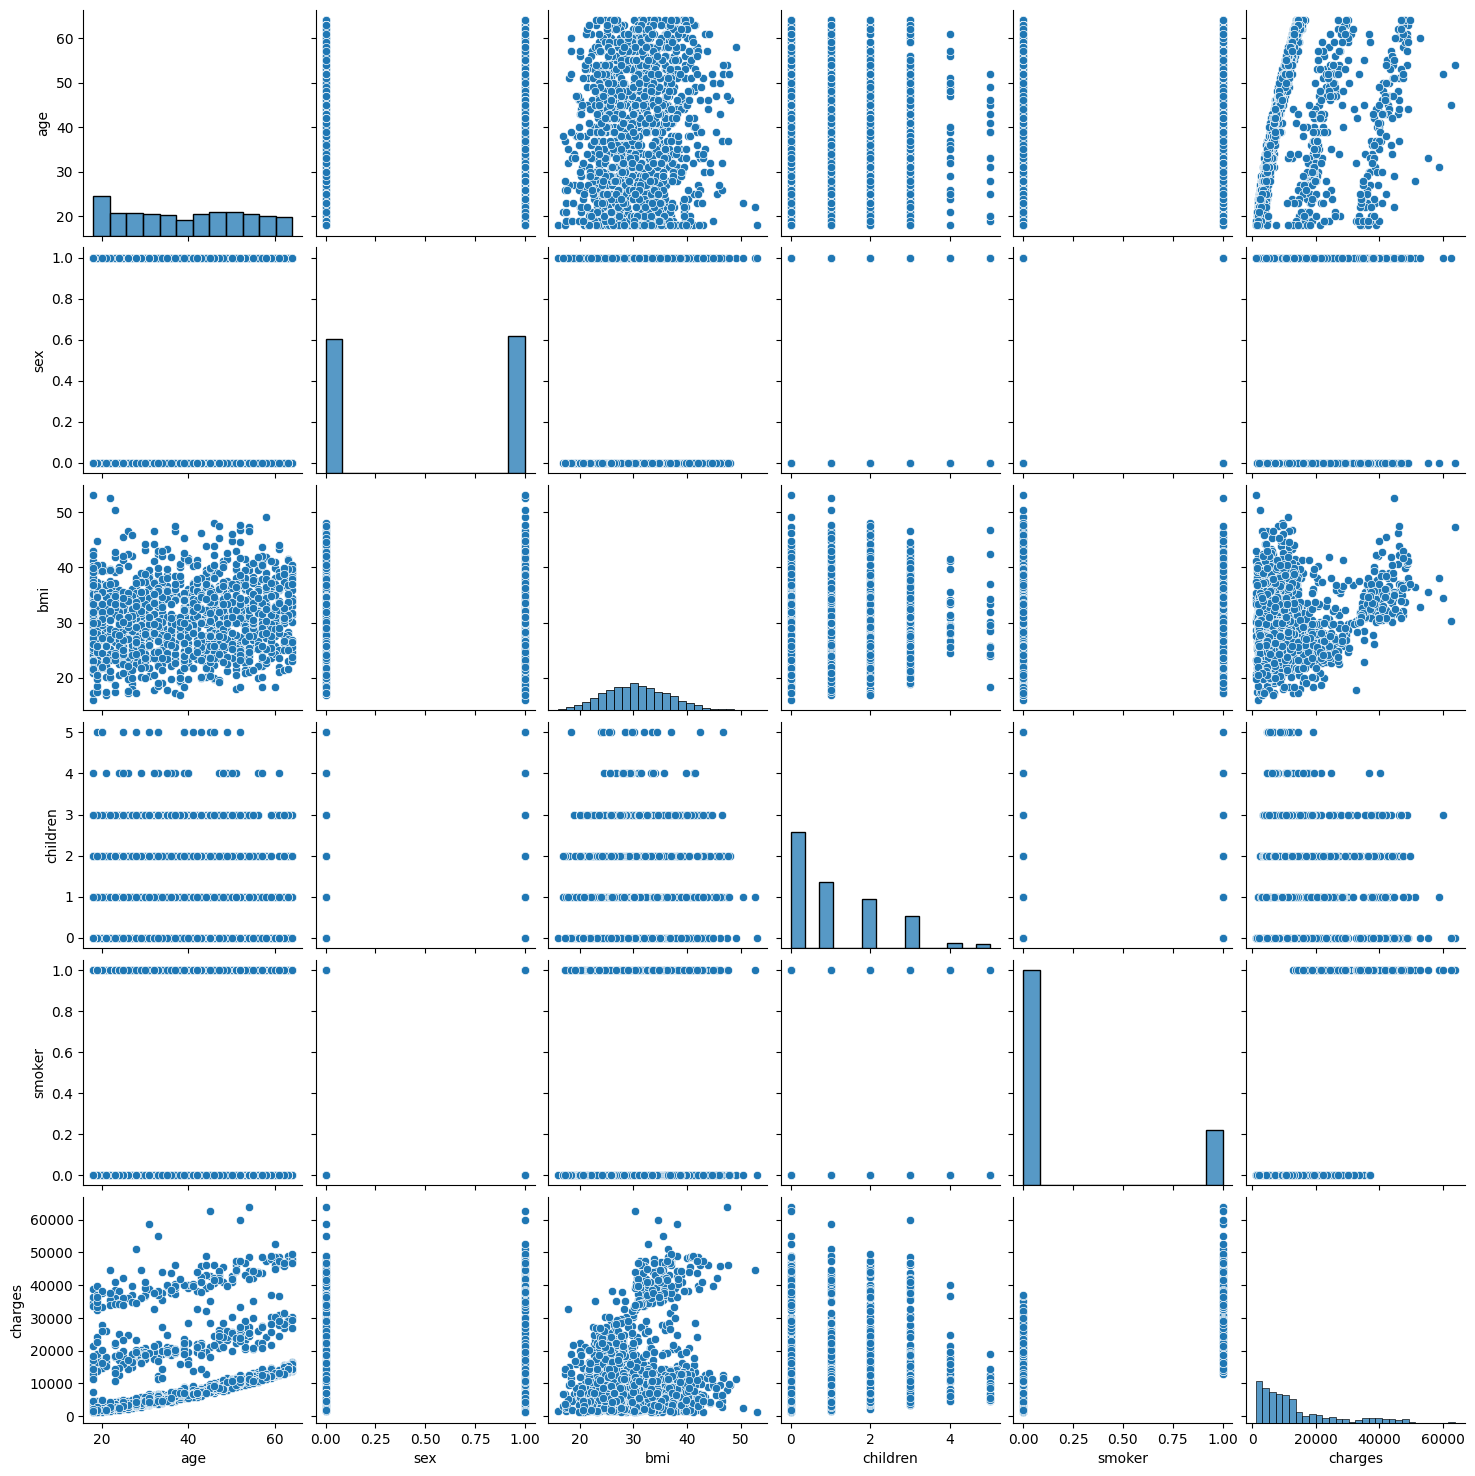

In [80]:
#statistical distribution
import seaborn as sns
sns.pairplot(raw_data)

In [81]:
#Display data and seperate into input x and output y data
raw_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [82]:
x = raw_data[['age','sex', 'bmi', 'children','smoker']]

In [83]:
y = raw_data[['charges']]

In [84]:
#split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)

In [85]:
x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 482 to 684
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       892 non-null    int64  
 1   sex       892 non-null    int64  
 2   bmi       892 non-null    float64
 3   children  892 non-null    int64  
 4   smoker    892 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 41.8 KB
<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 482 to 684
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  892 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [86]:
#Regression model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[  260.1423112    -71.76915955   315.22441969   545.72248029
  23252.13608407]]
[-12013.76012735]


In [87]:
#Print model coefficients
pd.DataFrame(np.transpose(model.coef_), x.columns, columns = ['Coeff'])
print("The Insurance Charge Regression model is: charge = ", model.intercept_, '+', np.transpose(model.coef_)[0], x.columns[0],'+',np.transpose(model.coef_)[1], x.columns[1],'+',np.transpose(model.coef_)[2], x.columns[2],'+',np.transpose(model.coef_)[3], x.columns[3],'+',np.transpose(model.coef_)[4], x.columns[4])

The Insurance Charge Regression model is: charge =  [-12013.76012735] + [260.1423112] age + [-71.76915955] sex + [315.22441969] bmi + [545.72248029] children + [23252.13608407] smoker


In [88]:
#Testing the model
predictions = model.predict(x_test)

Text(0.5, 1.0, 'Actual vs. Predicted Charges')

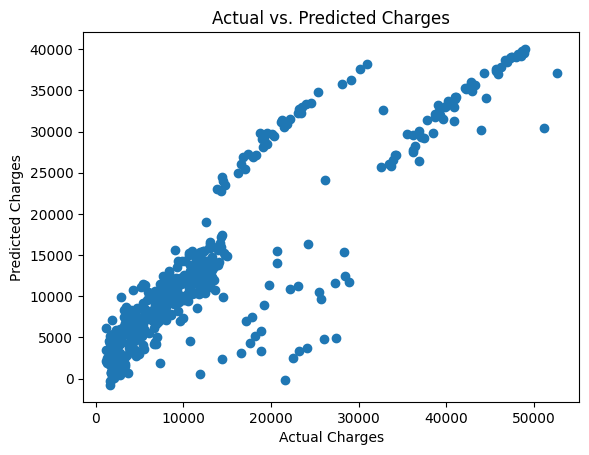

In [89]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')

Text(0.5, 1.0, 'Distribution of Predicted Charges')

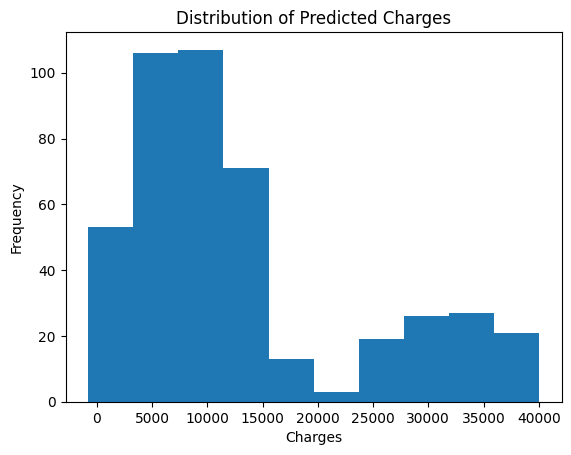

In [91]:
plt.hist(predictions, label='Predicted Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Charges')

Text(0.5, 1.0, 'Distribution of Actual Charges')

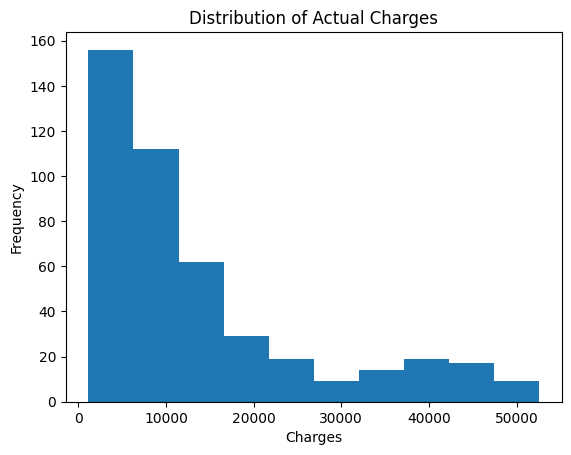

In [92]:
plt.hist(y_test, label='Actual Charges')

plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Charges')

In [93]:
#Evaluate the regression model's error
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
Rel_MAE = MAE/np.mean(y_test)
Rel_RMSE = RMSE/np.mean(y_test)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('Relative MAE: ', '{0:.2f}'.format((Rel_MAE*100)),'%')
print('Relative RMSE: ', '{0:.2f}'.format((Rel_RMSE*100)),'%')

MAE:  4104.990547338249
MSE:  34229832.217248306
RMSE:  5850.626651671452
Relative MAE:  30.33 %
Relative RMSE:  43.23 %
